In [47]:
#Import Basic packages
import json
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt

In [2]:
#Extract first 400k entries
review = pd.read_json('review.json', chunksize = 400000,lines = True,orient='columns')
for i in review:
    review_subset = i
    break
review_subset.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,Q1sbwvVQXV2734tPgoKj4Q,hG7b0MtEbXx5QzbzE6C_VA,ujmEBvifdJM6h6RLv4wQIg,1,6,1,0,Total bill for this horrible service? Over $8G...,2013-05-07 04:34:36
1,GJXCdrto3ASJOqKeVWPi6Q,yXQM5uF2jS6es16SJzNHfg,NZnhc2sEQy3RmzKTZnqtwQ,5,0,0,0,I *adore* Travis at the Hard Rock's new Kelly ...,2017-01-14 21:30:33
2,2TzJjDVDEuAW6MR5Vuc1ug,n6-Gk65cPZL6Uz8qRm3NYw,WTqjgwHlXbSFevF32_DJVw,5,3,0,0,I have to say that this office really has it t...,2016-11-09 20:09:03
3,yi0R0Ugj_xUx_Nek0-_Qig,dacAIZ6fTM6mqwW5uxkskg,ikCg8xy5JIg_NGPx-MSIDA,5,0,0,0,Went in for a lunch. Steak sandwich was delici...,2018-01-09 20:56:38
4,11a8sVPMUFtaC7_ABRkmtw,ssoyf2_x0EQMed6fgHeMyQ,b1b1eb3uo-w561D0ZfCEiQ,1,7,0,0,Today was my second out of three sessions I ha...,2018-01-30 23:07:38


In [3]:
#Find the most reviewed business 
review_subset= review_subset.sort_values(by=['business_id'])
review_subset

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
281738,E1uqmwcLVmEVIxAEZJ0Vwg,dgjZPH_4utmDydkyP3P09w,--Gc998IMjLn8yr-HTzGUg,1,0,0,0,Came here based in the hours posted but when w...,2016-05-23 18:24:30
166997,PE8Uzlpx9fFQjrlqnOKfoA,Ws6z36Ffk4X8B6XHDerg6Q,--Gc998IMjLn8yr-HTzGUg,5,0,1,0,Delicious! \n\nCame from Chicago this evening ...,2014-07-01 01:22:49
397354,kd3uZuOGQJoyZCeFDqxLtA,2Z8czZ9VpUAy3bd1tRz3HA,--I7YYLada0tSLkORTHb5Q,5,1,1,1,"Terrific food, craft beer and service. Came on...",2017-07-26 01:31:51
379087,wAGbnidMIgWwJZfm-q9sOQ,6UpjDkAgTbaBk-75lSEcXg,--I7YYLada0tSLkORTHb5Q,5,2,2,1,Not really sure what happened since my last vi...,2016-10-09 21:30:09
348804,lyfmNEo0FLZTj51oD40eBQ,TVfqVUVHzsRpW3rgS8hr9A,--I7YYLada0tSLkORTHb5Q,1,0,0,0,we have gone to this restaurant several times ...,2016-09-24 20:37:45
...,...,...,...,...,...,...,...,...,...
343423,zEhu7jdpzx-bS6EkR-2cNA,GHF_RjXK5Uwfi7Xfj3ZuBA,zzwhN7x37nyjP0ZM8oiHmw,2,2,0,0,Just ate at Carmody's in Neville Island. Food...,2017-06-23 00:32:13
97186,gAi-OkIx7YtUoQhcmIWeeA,axsC3r21Udnrn1pjhRepCg,zzwhN7x37nyjP0ZM8oiHmw,5,3,0,1,Great staff and amazing food! \n\nWe stopped h...,2016-03-09 00:39:53
393710,f-Undn6wC4resdolrGQyeA,5JVY32_bmTBfIGpCCsnAfw,zzwhN7x37nyjP0ZM8oiHmw,4,2,1,4,This was bookmarked on my Yelp page and I fina...,2018-01-29 18:03:45
116384,tZ1eeblxwJEpospfybB9eA,_XXhxPRfe8nwzbY4yjVo2A,zzwhN7x37nyjP0ZM8oiHmw,5,1,0,1,I came here with family as I'm visiting from S...,2017-07-21 14:12:42


In [4]:
all_business = pd.read_json('business.json', lines = True, orient='columns')
all_business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,1SWheh84yJXfytovILXOAQ,Arizona Biltmore Golf Club,2818 E Camino Acequia Drive,Phoenix,AZ,85016,33.522143,-112.018481,3.0,5,0,{'GoodForKids': 'False'},"Golf, Active Life",None
1,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,128,1,"{'RestaurantsReservations': 'True', 'GoodForMe...","Specialty Food, Restaurants, Dim Sum, Imported...","{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W..."
2,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,"10110 Johnston Rd, Ste 15",Charlotte,NC,28210,35.092564,-80.859132,4.0,170,1,"{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...","Sushi Bars, Restaurants, Japanese","{'Monday': '17:30-21:30', 'Wednesday': '17:30-..."
3,xvX2CttrVhyG2z1dFg_0xw,Farmers Insurance - Paul Lorenz,"15655 W Roosevelt St, Ste 237",Goodyear,AZ,85338,33.455613,-112.395596,5.0,3,1,None,"Insurance, Financial Services","{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ..."
4,HhyxOkGAM07SRYtlQ4wMFQ,Queen City Plumbing,"4209 Stuart Andrew Blvd, Ste F",Charlotte,NC,28217,35.190012,-80.887223,4.0,4,1,"{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...","Plumbing, Shopping, Local Services, Home Servi...","{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ..."


In [5]:
result = pd.merge(review_subset,
                 all_business[['business_id', 'name']],
                 on='business_id', 
                 how='left')

In [6]:
#Find the most reviewed business, change n= for others
df = result[['date','name','stars','text']]
business_name = df["name"].value_counts().nlargest(n=5)
business_name

The Buffet at Bellagio                         2739
Yardbird Southern Table & Bar                  2272
The Venetian Las Vegas                         2191
Guy Fieri's Vegas Kitchen & Bar                2145
The Peppermill Restaurant & Fireside Lounge    2091
Name: name, dtype: int64

In [81]:
#Keep entries only from this business, Name for other business
business = df[df['name'] == "The Buffet at Bellagio"]
#Reset index 
business.reset_index(drop=True, inplace = True)

# Bag of Words

In [82]:
from sklearn.feature_extraction.text import CountVectorizer,ENGLISH_STOP_WORDS
import re
my_stop_words = ENGLISH_STOP_WORDS.union(['restaurant'])
vect = CountVectorizer(token_pattern = r'\b[^\d\W][^\d\W]+\b',max_features=200, ngram_range=(2, 2), max_df=500, stop_words = my_stop_words)
vect.fit(business.text)
X_review = vect.transform(business.text)
X_df=pd.DataFrame(X_review.toarray(), columns=vect.get_feature_names())
print(X_df.head())

   alaskan king  asian food  bacchanal buffet  beef wellington  \
0             0           0                 0                0   
1             0           0                 0                0   
2             0           0                 0                0   
3             0           0                 0                0   
4             0           0                 0                0   

   bellagio buffet  best buffet  best buffets  best thing  better buffet  \
0                0            0             0           0              0   
1                0            0             0           0              0   
2                0            2             0           0              0   
3                0            0             0           0              0   
4                0            0             0           0              0   

   better buffets  ...  weekend brunch  went buffet  went lunch  wicked spoon  \
0               0  ...               0            0           0  

# Tokenize reviews

In [83]:
from nltk import word_tokenize
word_tokens = [word_tokenize(item) for item in business.text]
words = [[word for word in item if word.isalpha()] for item in word_tokens]
len_tokens = []
for i in range(len(word_tokens)):
     len_tokens.append(len(word_tokens[i]))
business['n_words'] = len_tokens
business.head()

C:\Users\yorkf\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,date,name,stars,text,n_words
0,2010-03-26 04:38:39,The Buffet at Bellagio,4,I came back for dinner on a Tuesday and the li...,323
1,2015-11-27 03:52:36,The Buffet at Bellagio,4,This is usually a must do for us when In Vegas...,89
2,2013-02-04 18:02:06,The Buffet at Bellagio,3,I was disappointed. Who said this is the best ...,150
3,2016-10-06 19:50:19,The Buffet at Bellagio,2,What a waste of beautiful spaces. Yes its beau...,152
4,2010-01-26 02:43:54,The Buffet at Bellagio,4,i absolutely loved the variety of foods they h...,69


In [84]:
business['stars'].mean()

3.3274917853231107

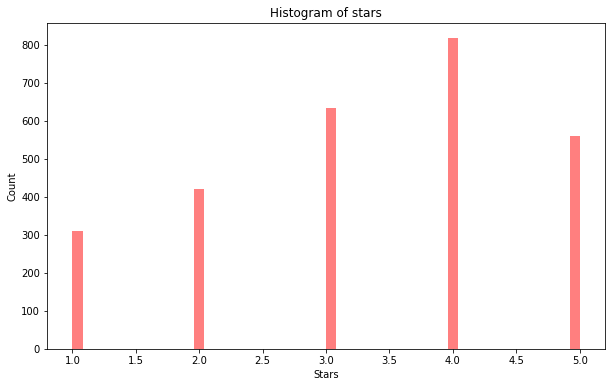

In [87]:
num_bins = 50
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(business.stars, num_bins, facecolor='red', alpha=0.5)
plt.xlabel('Stars')
plt.ylabel('Count')
plt.title('Histogram of stars')
plt.show()

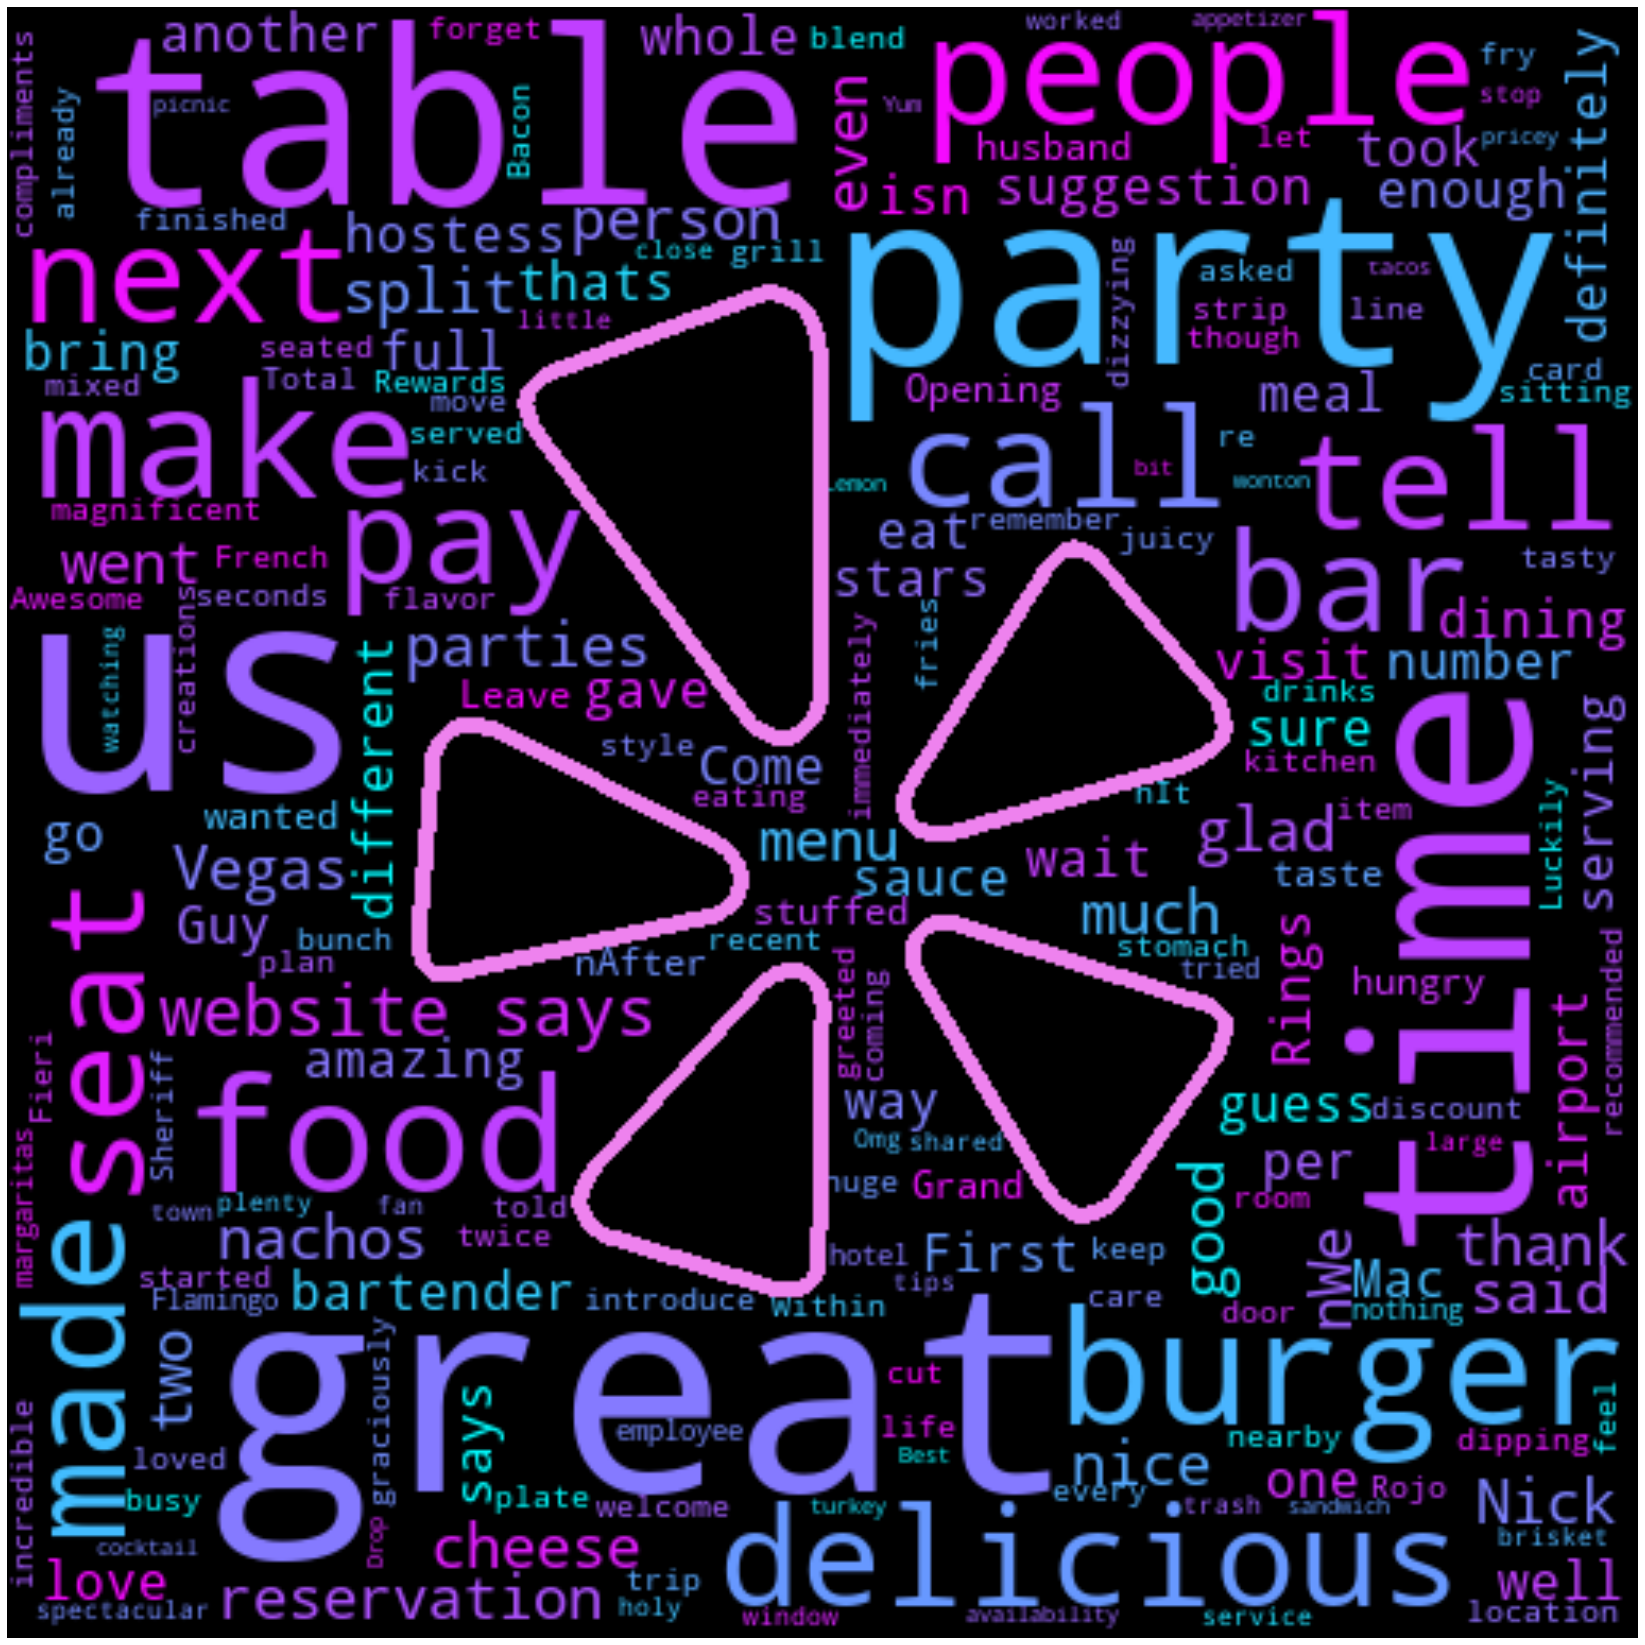

In [68]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image
text = business.text.values
mask = np.array(Image.open("yelp.png"))
my_stopwords = set(STOPWORDS)
my_stopwords.update(['restaurant','back','ordered','order','came','got','will','etc'])
plt.figure(figsize=(60,30))
my_cloud = WordCloud(width=3600, height=2400,mask=mask, contour_width=5, contour_color='violet',
                     colormap=plt.cm.cool,background_color = 'black',stopwords = my_stopwords).generate(str(text))
plt.imshow(my_cloud,interpolation = 'bilinear')
plt.axis("off")
plt.show()

# Sentiment Analysis

# Method 1: TextBlob

In [11]:
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *

In [69]:
#Text Blob 
from textblob import TextBlob
business[['polarity', 'subjectivity']] = business['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
business.head()

C:\Users\yorkf\Anaconda3\lib\site-packages\pandas\core\frame.py:3509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,date,name,stars,text,n_words,polarity,subjectivity
0,2014-05-26 06:08:17,Guy Fieri's Vegas Kitchen & Bar,4,Come hungry! Leave stuffed!\n\nAfter dining wi...,239,0.590789,0.752632
1,2017-02-22 20:40:48,Guy Fieri's Vegas Kitchen & Bar,5,We had a great time here! So much that we wen...,184,0.410667,0.525278
2,2017-05-07 02:43:43,Guy Fieri's Vegas Kitchen & Bar,4,This restaurant was recommended to us by an em...,126,0.452060,0.671429
3,2015-04-06 14:15:57,Guy Fieri's Vegas Kitchen & Bar,2,"I feel like, if you're a fan of Guy, you'll lo...",207,0.191840,0.526389
4,2016-01-31 22:39:25,Guy Fieri's Vegas Kitchen & Bar,3,"I ate at Guy's with a friend in January 2016, ...",156,0.412093,0.479881


In [23]:
#Sample
sample = business['text'][200]
print(sample)
print(TextBlob(sample).sentiment)

This place is over the top! The food is great and the portions...when the hell did every restaurant in Vegas begin serving only sumo wrestlers. My family had a great mix of food - the Mayor of Flavortown Burger, Motley Que Sandwich and Vegas Fries. Don't kid yourself, the fries aren't a side; not by a long shot. They are a meal and for $13, they're a very filling meal. We all loved our food, but I'll have to say the Motley Que was the best meal of the night. Damn it! My wife is always bragging about how she's better at ordering, and she did it again here. 

This place isn't inexpensive, but the portions and quality make it well worth it. We had dinner at BurGR the night before and for the same $100, this is the better option by a long shot. 

My only complaint is the hostess staff. They treat you like crap - you're just a number to them. They have no personality and make no effort to get you excited about the meal - give me you cell number and we'll text you. NEXT! When I asked about t

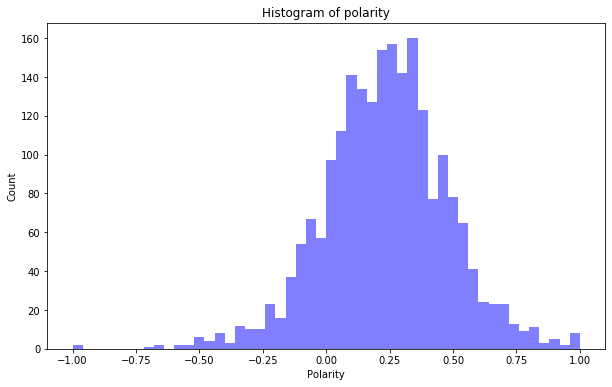

In [27]:
num_bins = 50
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(business.polarity, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Histogram of polarity')
plt.show()

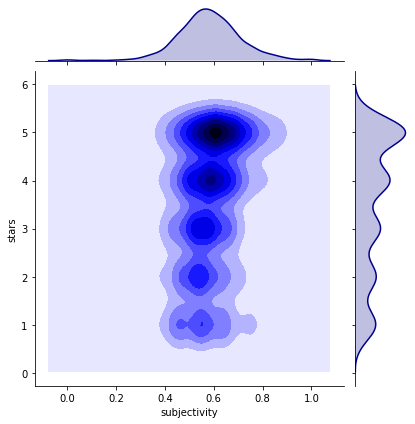

In [31]:
import seaborn as sns
sns.jointplot(x="subjectivity", y="stars", data=business, kind="kde", color="darkblue")

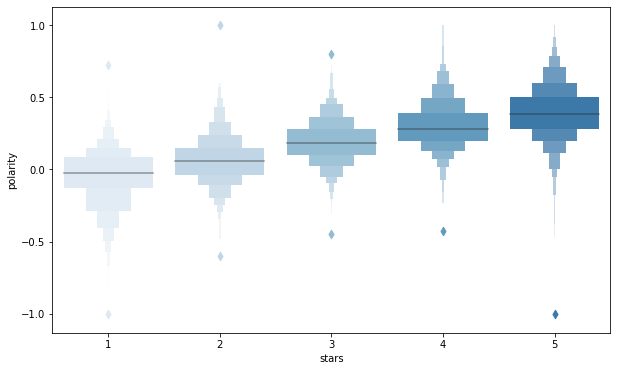

In [38]:
plt.figure(figsize=(10,6))
sns.set_palette("Blues")
sns.boxenplot(x='stars', y='polarity', data=business)
plt.show()

# Method 2: Vader

In [70]:
all_reviews = business['text']
all_sent_values = []
all_sentiments = []

In [71]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
def sentiment_value(paragraph):
    analyser = SentimentIntensityAnalyzer()
    result = analyser.polarity_scores(paragraph)
    score = result['compound']
    return round(score,1)

In [72]:
#Testing, change index to test another 
sample = business['text'][200]
print(sample)
print('Sentiment: ')
print(sentiment_value(sample))

This place is over the top! The food is great and the portions...when the hell did every restaurant in Vegas begin serving only sumo wrestlers. My family had a great mix of food - the Mayor of Flavortown Burger, Motley Que Sandwich and Vegas Fries. Don't kid yourself, the fries aren't a side; not by a long shot. They are a meal and for $13, they're a very filling meal. We all loved our food, but I'll have to say the Motley Que was the best meal of the night. Damn it! My wife is always bragging about how she's better at ordering, and she did it again here. 

This place isn't inexpensive, but the portions and quality make it well worth it. We had dinner at BurGR the night before and for the same $100, this is the better option by a long shot. 

My only complaint is the hostess staff. They treat you like crap - you're just a number to them. They have no personality and make no effort to get you excited about the meal - give me you cell number and we'll text you. NEXT! When I asked about t

In [73]:
for i in range(0,len(business)):
    all_sent_values.append(sentiment_value(all_reviews[i]))
business.shape

(2145, 7)

In [74]:
#Set Sentiment Scale 
SENTIMENT_VALUE = []
SENTIMENT = []
for i in range(0,len(business)):
    sent = all_sent_values[i]
    if (sent<=1 and sent>=0.5):
        SENTIMENT.append('Very Positive')
        SENTIMENT_VALUE.append(5)
    elif (sent<0.5 and sent>0):
        SENTIMENT.append('Positive')
        SENTIMENT_VALUE.append(4)
    elif (sent==0):
        SENTIMENT.append('Neutral')
        SENTIMENT_VALUE.append(3)
    elif (sent<0 and sent>=-0.5):
        SENTIMENT.append('Negative')
        SENTIMENT_VALUE.append(2)
    else:
        SENTIMENT.append('Very Negative')
        SENTIMENT_VALUE.append(1)


In [75]:
business['SENTIMENT_VALUE'] = SENTIMENT_VALUE
business['SENTIMENT'] = SENTIMENT
business.head()

C:\Users\yorkf\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\yorkf\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date,name,stars,text,n_words,polarity,subjectivity,SENTIMENT_VALUE,SENTIMENT
0,2014-05-26 06:08:17,Guy Fieri's Vegas Kitchen & Bar,4,Come hungry! Leave stuffed!\n\nAfter dining wi...,239,0.590789,0.752632,5,Very Positive
1,2017-02-22 20:40:48,Guy Fieri's Vegas Kitchen & Bar,5,We had a great time here! So much that we wen...,184,0.410667,0.525278,5,Very Positive
2,2017-05-07 02:43:43,Guy Fieri's Vegas Kitchen & Bar,4,This restaurant was recommended to us by an em...,126,0.452060,0.671429,5,Very Positive
3,2015-04-06 14:15:57,Guy Fieri's Vegas Kitchen & Bar,2,"I feel like, if you're a fan of Guy, you'll lo...",207,0.191840,0.526389,5,Very Positive
4,2016-01-31 22:39:25,Guy Fieri's Vegas Kitchen & Bar,3,"I ate at Guy's with a friend in January 2016, ...",156,0.412093,0.479881,5,Very Positive


In [76]:
counter = 0
for i in range(0,len(business)):
    if (abs(business['stars'][i]-business['SENTIMENT_VALUE'][i])>1):
        counter += 1
print(counter)
accuracy = (business.shape[0]-counter)/business.shape[0]
percent_accuracy = accuracy*100
print(percent_accuracy)

677
68.43822843822845


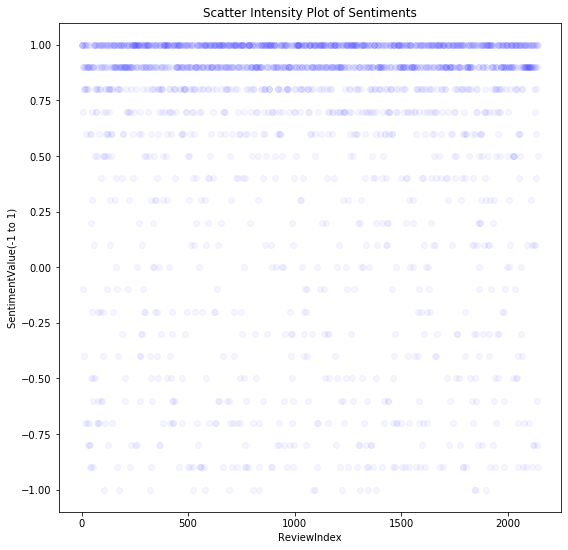

In [77]:
#Visualize Sentiment Intensity
xaxis = []
for i in range(0,len(business)):
    xaxis.append(i)

ylabel_new_1 = all_sent_values[:len(business)]

xlabel = xaxis
plt.figure(figsize=(9,9))
plt.xlabel('ReviewIndex')
plt.ylabel('SentimentValue(-1 to 1)')
plt.plot(xlabel, ylabel_new_1, 'ro',color= "blue",alpha=0.04)

plt.title('Scatter Intensity Plot of Sentiments')
plt.show()